# Module 3 homework

**This homework has 8 questions.**

In [33]:
import math
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from utils import plot_decision_boundary

In [34]:
random.seed(42)

Here, we generate a synthetic dataset for classification with two predictors, `x1` and `x2`.

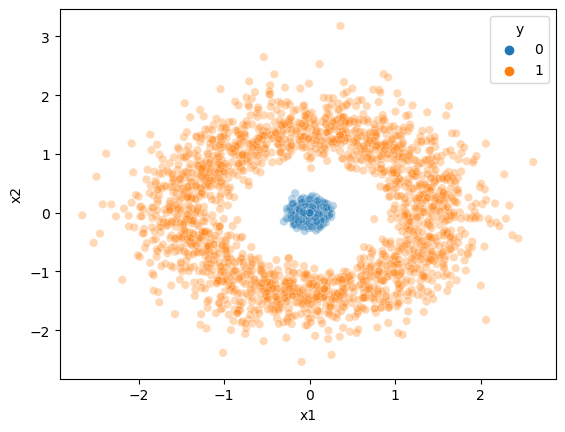

In [36]:
def radial2cartesian(rho, theta):
    return rho * math.cos(theta), rho * math.sin(theta)

n_class0 = 2000
n_class1 = 2000

rho = [random.normalvariate(0.0, 0.10) for _ in range(n_class0)] + \
      [random.lognormvariate(0.4, 0.2) for _ in range(n_class1)]
theta = [random.uniform(0, 2 * math.pi) for _ in range(n_class0 + n_class1)]

data = pd.DataFrame([radial2cartesian(r, t) for r, t in zip(rho, theta)], columns=['x1', 'x2'])
data['y'] = pd.Series([0] * n_class0 + [1] * n_class1)

#data.head()
_ = sns.scatterplot(x='x1', y='x2', hue='y', data=data, alpha=0.3)

Let's see how logistic regression (which is a linear classifier) performs on these data.

In [38]:
logistic_regression = LogisticRegression().fit(data[['x1', 'x2']], data['y'])

C:\Users\yashayi\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


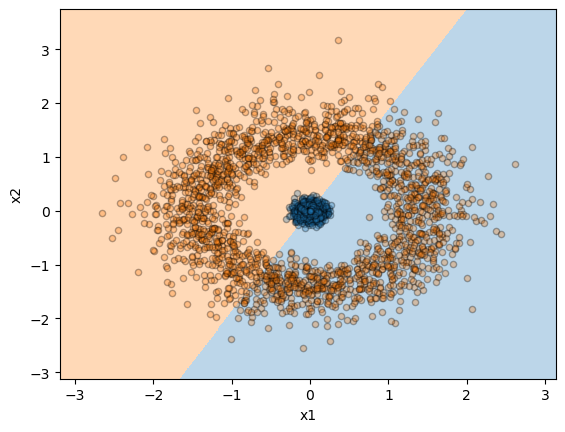

In [39]:
plot_decision_boundary(
    logistic_regression,
    data[['x1', 'x2']], data['y'],
    n_points=500, alpha=0.3, x_label='x1', y_label='x2'
)

In [7]:
accuracy_score(data['y'], logistic_regression.predict(data[['x1', 'x2']]))

0.517

In [8]:
precision_score(data['y'], logistic_regression.predict(data[['x1', 'x2']]))

0.517913593256059

In [9]:
recall_score(data['y'], logistic_regression.predict(data[['x1', 'x2']]))

0.4915

As expected, the logistic classifier does not perform too well since the two classes are not linearly separable in the predictors space.

Let's see if a Support Vector Machine classifier can learn a transformation of the current predictors such that in the transformed (and potentially higher-dimensional) predictors space the two classes are linearly separable.

## Question 1 (1 points)

Fit a Support Vector Machine (SVM) classifier to solve this classification problem.

Use the default values for the margin parameter `C` and for the kernel function, but tune the $\gamma$ parameter using 2-fold cross-validation.

Save your final cross-validated SVM classifier in a variable named `svc`.

In [40]:
gamma_candidates = np.logspace(-2, 1, 20)

## Answer 1

In [45]:
svc =  make_pipeline(StandardScaler(),
                             SVC(random_state=42))

svc = SVC()

# Define the parameter grid to search
param_grid = {'gamma': gamma_candidates}

# Perform grid search with 2-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=2)
grid_search.fit(data[['x1', 'x2']], data['y'])

# Get the best estimator
svc = grid_search.best_estimator_

# Print the best parameter found
print("Best gamma:", grid_search.best_params_['gamma'])

#best gamma is: Best gamma: 0.18329807108324356

Best gamma: 0.18329807108324356


Here we plot the decision boundary learned by the SVM.

C:\Users\yashayi\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


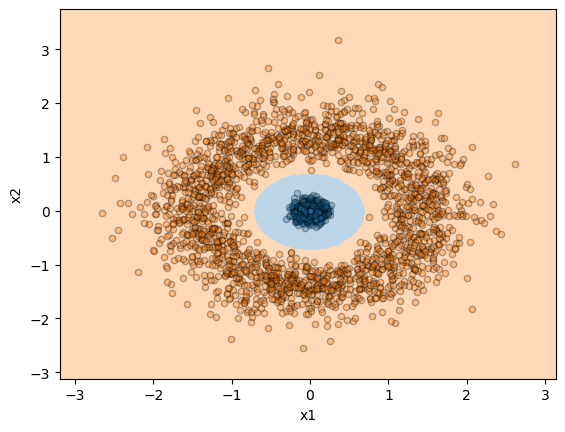

In [46]:
try:
    plot_decision_boundary(
        svc,
        data[['x1', 'x2']], data['y'],
        n_points=500, alpha=0.3, x_label='x1', y_label='x2'
    )
except NameError:
    print('The object `svc` does not exist! Did you forget to create it?')

## Question 2 (1 point)

Compute the accuracy, precision, and recall of your SVM on these same data.

## Answer 2

In [19]:
# your answer here
precision_recall = {
    'accuracy': accuracy_score(data['y'], svc.predict(data[['x1', 'x2']])),
    'precision': precision_score(data['y'], svc.predict(data[['x1', 'x2']])),
    'recall': recall_score(data['y'], svc.predict(data[['x1', 'x2']]))
}
precision_recall

#accuracy/precision/recall are 1, which is a lot better, it shows SVC fits a better model than linea regression.

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}

## Question 3 (2 point)

Explain in English what particular aspect of the relationship between the predictor variables `x1` and `x2` and the class variable `y` the SVM seems to have learned which made it possible to separate the two classes.

*The shape of the decision boundary of the SVM should give you a clear hint.*

## Answer 3

In [21]:
The shape of the decision boundary of the SVM shows it seperated the two classes very well.
SVM takes the data, originally linearly in-seperatable. It uses distance from the origin as the third dimension,
projects it and calculates the fathest distance in optimal distance, minimize the loss and learns the distance from its origin. 

SVM is a generalizeable decision model. it learned decision boundary very well.

Because the date was generated using radial coordinates (rho and theta), SVM learned to use  
the radial pattern of the classes. This could mean that the SVM has identified a circular shape to separate the classes in this case.

SyntaxError: invalid syntax (1747855424.py, line 1)

## Question 4 (1 points)

We are now going to try and become a "human Support Vector Machine" and see if we can construct a new predictor `x3` that makes the two classes linearly separable in the higher-dimensional space determined by the triplet of predictors `x1`, `x2`, `x3`.

Using `x1` and `x2`, build a new predictor `x3` in the dataset that makes the two classes linearly separable.

*Leverage the observation that you made when you answered Question 3.*

*Also, recall that the distance of a generic point `x, y` from the center of the plane can be computed as $\sqrt{x^2 + y^2}$, which in Python can be translated to `np.sqrt(x**2 + y**2)`.*

## Answer 4

In [48]:
data['x3'] = np.sqrt(data['x1']**2 + data['x2']**2)
print(data.head())

         x1        x2  y        x3
0  0.036610 -0.071264  0  0.080117
1  0.046833  0.059192  0  0.075478
2  0.059093  0.043085  0  0.073132
3 -0.006905 -0.004574  0  0.008283
4  0.130884 -0.047531  0  0.139247


We'll now fit a logistic regression model (which is a linear classifier) on the new set of predictors `x1`, `x2`, `x3`.

In [26]:
try:
    logistic_regression = LogisticRegression().fit(data[['x1', 'x2', 'x3']], data['y'])
except KeyError:
    print('The column `x3` does not exist! Did you forget to create it in the `data` DataFrame?')

## Question 5 (1 points)

Report the accuracy, precision, and recall of the logistic regression model using the three predictors `x1`, `x2`, and `x3`.

Did your new feature help the logistic regression model separate the two classes?

## Answer 5

In [28]:
# your answer here
precision_recall2 = {
    'accuracy': accuracy_score(data['y'], logistic_regression.predict(data[['x1', 'x2', 'x3']])),
    'precision': precision_score(data['y'], logistic_regression.predict(data[['x1', 'x2', 'x3']])),
    'recall': recall_score(data['y'], logistic_regression.predict(data[['x1', 'x2', 'x3']]))
}
precision_recall2
#the numbers are all 1.0, which is a match to SVM

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}

## Question 6 (1 points)

Generate a scatterplot of `x1` and `x3` colored by `y` and another scatterplot of `x2` and `x3` also colored by `y`.

## Answer 6

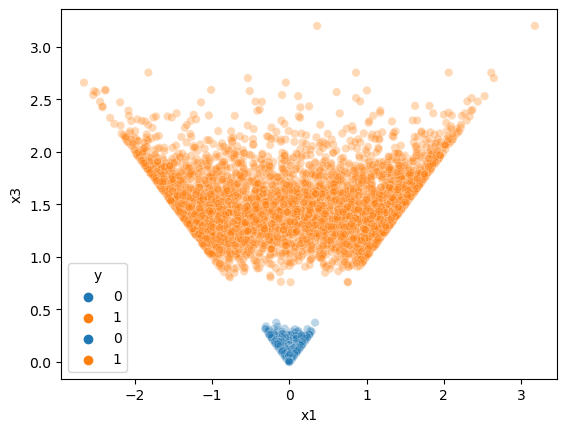

In [29]:
# your answer here
_ = sns.scatterplot(x='x1', y='x3', hue='y', data=data, alpha=0.3)

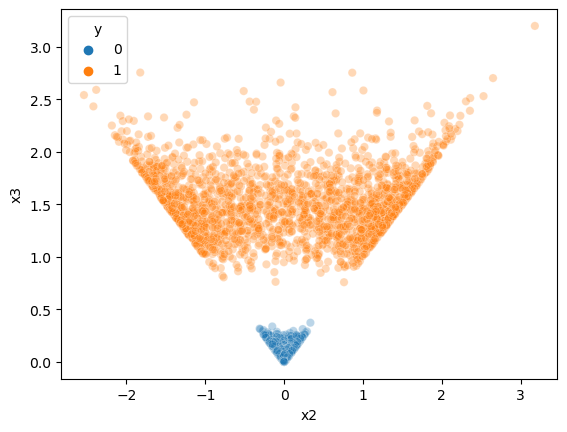

In [30]:

_ = sns.scatterplot(x='x2', y='x3', hue='y', data=data, alpha=0.3)

We can also visualize this in three dimensions:

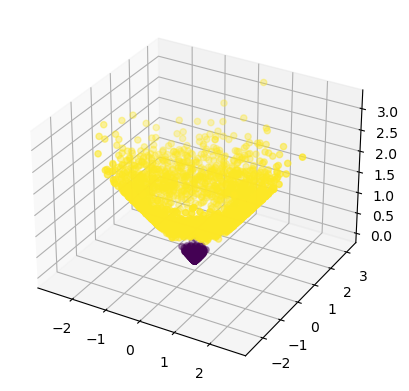

In [31]:
try:
    _ = plt.axes(projection = '3d')
    _ = _.scatter3D(data['x1'], data['x2'], data['x3'], c=data['y'])
except KeyError:
    print('The column `x3` does not exist! Did you forget to create it in the `data` DataFrame?')

## Question 7 (1 points)

Did the introduction of your new predictor `x3` make this classification problem a classification problem with linearly separable classes? Explain.

## Answer 7

Yes, the introduction of the new predictor `x3` did make the classification problem one with linearly separable classes. 
`x3` represents the distance of each data point from the origin in the `x1' and 'x2`, it is basically the third dimension that is added to seperate two classes.

The original problem showed classes which has a radial/circular pattern, and they were not linearly separable in the `x1' and 'x2`. Introducing `x3` as the distance from the origin and compare x1, x3 and y or x2, x3 and y or x1,x2,x3 and y together did separate the classes as the graph showed above. the accuracy, precision, and recall all jumped from 0.5 to 1.0 shows it is producing a much more accurate result.

## Question 8 (2 points)

Research the concept of "Feature Engineering" on the web. At a minimum, read through [this article](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/).

Answer the following questions:

1. Can we consider `x3` as an "engineered" feature/predictor, and therefore can we say that we have applied "Feature Engineering" in the context of logistic regression?


2. What method was computationally more burdensome to solve the classification problem? The SVM or the logistic classifier? In other words, was one approach more straightforward than the other after we spent some time understanding our data?


3. In this case, we only had two predictors available and it was easy to visualize the structure of the data to come up with a nicely "engineered" feature that could help us solve the classification problem. What if we had hundreds of predictors? Or thousands of predictors? Would you prefer using an "automated" feature engineering system in this case? Would you apply your own domain knowledge? Would you try and combine both? Comment.

## Answer 8

Your answer here.

In [49]:
1. 
Yes, x3 can be considered an engineered feature. 
Feature engineering is the process of transforming raw data into features that better represent the 
underlying problem to the predictive models, resulting in improved model accuracy on unseen data.
In this case, `x3` was derived from `x1` and `x2`, it represents the distance of each data point 
from the origin in the `x1' and 'x2. By increasing the accuracy, precision, and recall, it qualifies as 
"feaure engineering" in this context.

2. 
SVM is more computationally burdensome. 
SVM is very costly when we have large datasets or complicated caculations. but we can optimize it.
In this case, introducing x3, the engineered feature is more straightforward, and calculates a lot faster.

3. 
If we have complicated data and many predictors, I will first use automated SVM approach to identify 
relavant features and reduce noises, then use domain knowledge/SVM to future
understand the data, and analyze key features. We can compare humanSVM and SVM to see which performs better.
We can figure out accuracy for both approaches. In reality, having domain knowledge can come up with answers much quicker.
so I will combine them after the first SVM automations. It uses data-driven and domain-specific approaches.

SyntaxError: invalid syntax (3039264976.py, line 2)